# Deviation Measures and Outliers

In [1]:
%run prelude.py
%matplotlib inline

#
# Copied from the Descriptive Statistics Notebook
#

def mean(X):
    return float(sum(X)) / len(X)

def median_range(X):
    S = sorted(X)
    n = len(X)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

def median(X):
    a,b = median_range(X)
    return (a+b)/2

def tmean(X,k):
    X = list(X)
    k = int(k)
    if len(X) <= 2*k:
        return None
    for i in range(k):
        X.remove(max(X))
        X.remove(min(X))
    return mean(X)

# Computation of Quantiles
def percentile_range(p,X):
    q = p/100.0
    S = sorted(X)
    n = len(X)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0:   upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0:   lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

def percentile(p,X):
    a,b = percentile_range(p,X)
    return (a+b)/2 # mid point percentile. One choice!

def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')
    
def plot_mean_median(X, title):
    plt.figure(figsize=(14,1))
    plt.title(title)
    print("###  " + title + " ###")
    sns.rugplot(X, color='grey', height=0.5)
    mark(mean(X));                     print("mean:        {:4.2f} (red)".format(mean(X)))
    k = int(math.ceil(10*len(X)/100.))
    mark(tmean(X,k), style='b');       print("tmean(X,{:2}): {:4.2f} (blue)".format(k,tmean(X,k)))
    mark(median(X), style='g');        print("median:      {:4.2f} (green)".format(median(X)))
    plt.show()

Z = [ np.random.normal() for x in range(500) ]
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
Y = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85

## Deviation Measures

Goal measure "typical" deviation form a central value.

1. The _maximal deviation_ is defined as

   $$ maxdev(X) = max \{ |X[i] - \mu| \,|\, i=1,\dots,n\}.$$

   (Better: span(X) = max(X) - min(X))

2. The _mean absolute deviation_ is defined as
   
   $$ mad(X) = \frac{1}{n} \sum_{i=1}^n |X[i] - \mu|.$$

3. The _standard deviation_ is defined as

   $$ \sigma(X) = stddev(X) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (X[i] - \mu)^2}.$$

4. The _inter quartile range_ is defined as difference of the 75- and 25-Percentile:

   $$ IQR(X) = P(75,X) - P(25,X) $$

Properties:
* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.
* The IQR is very robust to outliers.

In [2]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

def IQR(X): return percentile(75,X) - percentile(0.25,X)

# computation of percentiles is given below

In [3]:
# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print("center    = ", m)
    print("deviation = ", s)
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    plt.plot([m,m],[0,1],'r-' )
    plt.plot([m-s,m-s],[0,1],'b-')
    plt.plot([m+s,m+s],[0,1],'b-')
    plt.plot([m-s,m+s],[0.5,0.5],'b--')
    if new_canvas: plt.show()

Maximal deviation
center    =  -0.022650712138689955
deviation =  3.3722430915227943


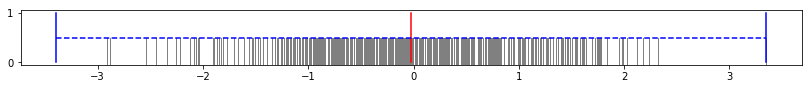

Standard Deviation
center    =  -0.022650712138689955
deviation =  0.969806874981624


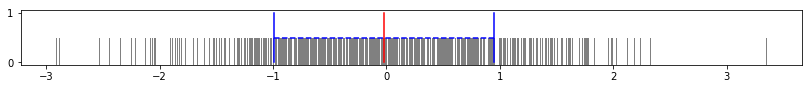

Mean Absolute Deviation
center    =  -0.022650712138689955
deviation =  0.7844981010733113


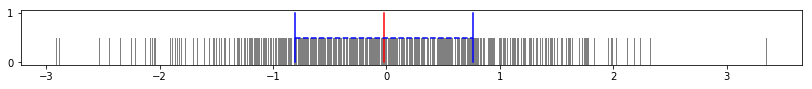

Median IQR
center    =  -0.06661306428102677
deviation =  1.805021756583935


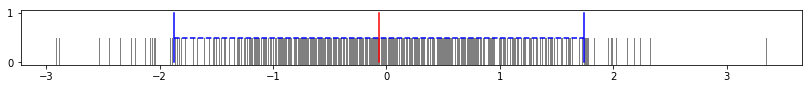

In [4]:
# Standard deviation is a good deviation for normal distributed data

print("Maximal deviation")
plot_mean_dev(Z,mean(Z),max_dev(Z))

print("Standard Deviation")
plot_mean_dev(Z,mean(Z),stddev(Z))

print("Mean Absolute Deviation")
plot_mean_dev(Z,mean(Z),mad(Z))

print("Median IQR")
plot_mean_dev(Z,median(Z),IQR(Z)/2)

Maximal deviation
center    =  1316.3086347078017
deviation =  738.072957089


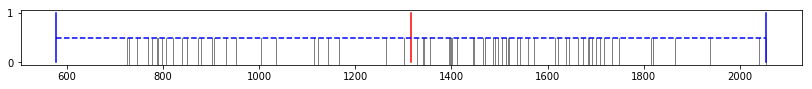

Standard Deviation
center    =  1316.3086347078017
deviation =  374.5723639541368


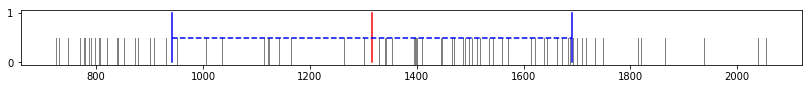

Mean Absolute Deviation
center    =  1316.3086347078017
deviation =  327.4656915


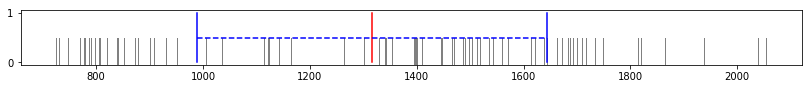

Mean Median IQR
center    =  1399.66320801
deviation =  452.709228516


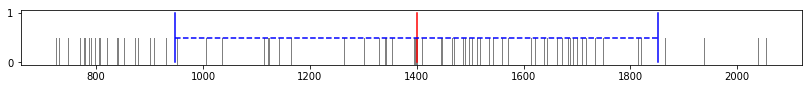

In [5]:
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
    
print("Maximal deviation")
plot_mean_dev(X,mean(X),max_dev(X))

print("Standard Deviation")
plot_mean_dev(X,mean(X),stddev(X))

print("Mean Absolute Deviation")
plot_mean_dev(X,mean(X),mad(X))

print("Mean Median IQR")
plot_mean_dev(X,median(X),IQR(X)/2)

Maximal deviation
center    =  47.951199999999986
deviation =  1175.0488


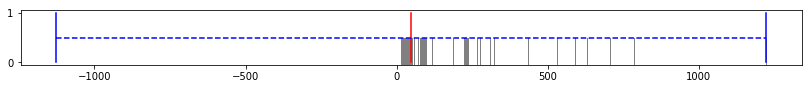

Standard Deviation
center    =  47.951199999999986
deviation =  92.46185126072268


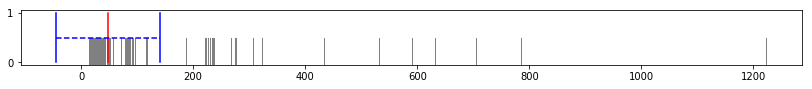

Mean Absolute Deviation
center    =  47.951199999999986
deviation =  34.9059744


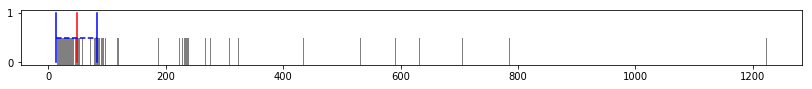

Mean Median IQR
center    =  28.2
deviation =  9.5


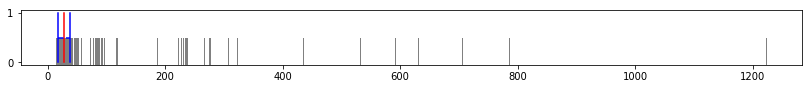

In [6]:
print("Maximal deviation")
plot_mean_dev(Y,mean(Y),max_dev(Y))

print("Standard Deviation")
plot_mean_dev(Y,mean(Y),stddev(Y))

print("Mean Absolute Deviation")
plot_mean_dev(Y,mean(Y),mad(Y))

print("Mean Median IQR")
plot_mean_dev(Y,median(Y),IQR(Y)/2)

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

# Tukey's outlier Definition

A k-outlier is a data point X which is either

* larger than `P(75) + k * IQR(X)` or
* smaller than `P(25) - k * IQR(X)`.

An outlier (without k) is an 1.5-outlier.

In [6]:
def outliers(X, k=1.5):
    iqr = IQR(X)
    lower_bound = percentile(25,X) - k * iqr
    upper_bound = percentile(75,X) + k * iqr
    out = []
    for x in X:
        if x < lower_bound: out.append(x)
        if x > upper_bound: out.append(x)
    return out

In [7]:
def outlier_plot(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile(25,X), percentile(75,X)
    O = outliers(X)
    print("IQR:", b-a)
    print("Outlier count:", len(O))
    mark_range(a,b)
    for o in O:
        plt.plot([o,o],[0.7,0.8],'b--')
    plt.ylim([0,1])

IQR: 1.4018401711563695
Outlier count: 0


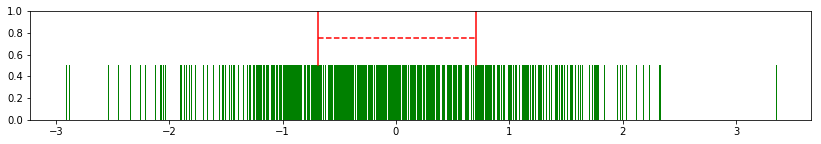

In [8]:
# Normal Data
outlier_plot(Z)

IQR: 725.891693115
Outlier count: 0


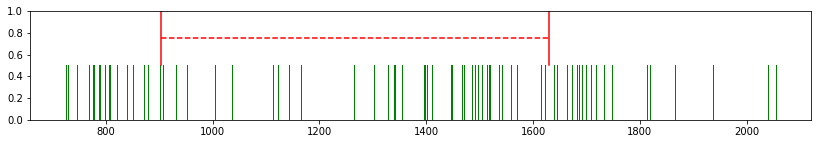

In [9]:
# Web request Rates
outlier_plot(X)

IQR: 9.0
Outlier count: 43


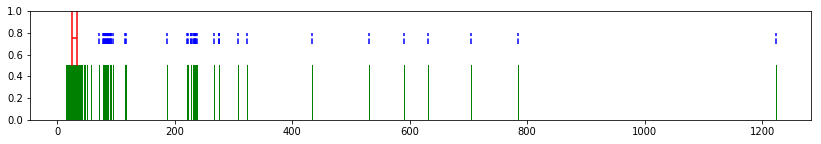

In [11]:
# Request Latencies
outlier_plot(Y)

# Tukey's Boxplots

Show:

* Median
* Box around 0.25 and 0.75 Quantiles
* "whiskers" from min to max
* points for outliers

Allows visual clues:

* Where is the data concentracted?
* How far is it spread?
* How skew is the data?

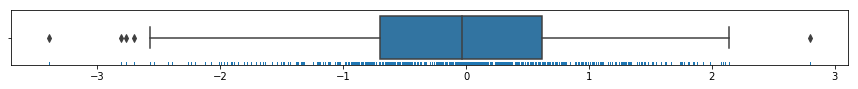

In [12]:
# Normal Data
plt.figure(figsize=(15,1))
sns.boxplot(x=Z)
sns.rugplot(Z)
plt.show()

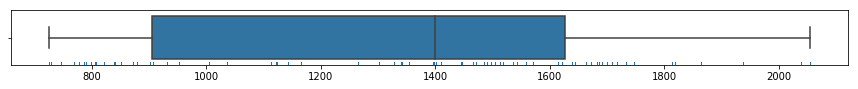

In [10]:
# Tukey Boxplots show outliers as 'points' outside the whiskers

# Web-request dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=X)
sns.rugplot(X)
plt.show()

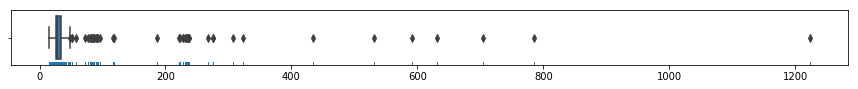

In [11]:
# Latency Dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=Y)
sns.rugplot(Y)
plt.show()

Demo:
- Global duration percentiles with Overlays: [demo](https://demo-hh2.circonus.com/trending/graphs/view/9e85beb8-4658-49f5-95e8-b6cf70ad5ca9#set-YVlpVTrN)
- Latency percentiles in CAQL [demo](https://demo-hh2.circonus.com/trending/graphs/edit/da4ac22a-55b9-6145-abbc-a0371919e876)

## Takeaway

* Don't use the standard-deviation if you can avoid it
* If you need a deviation measure use MAD or IQR:
  - (+) Simple to calculate
  - (+) Simple to interpret
  - (-) Not mergable